# Applied Statistics - Project 1
                                                                                    Aryan Jain
                                                                                    January 14, 2021
#### <span style="color:green">PROJECT SUMMARY</span>

**Data Description:**
    The data at hand contains medical costs of people characterized by certain attributes.
    
**Domain:**
    Healthcare
    
**Context:**
    Leveraging customer information is paramount for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have
    
**Learning Outcomes:**
* Exploratory Data Analysis (EDA)
* Practicing Statistics using Python
* Hypothesis Testing

**Objective:**
We want to see if we can dive deep into this data to find some valuable insights

**Attribute Information:**
* **`Age`**: Age of primary beneficiary
* **`Gender`** : Insurance contractor gender, female, male
* **`BMI`**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
* **`Children`**: Number of children covered by health insurance / Number of dependents
* **`Smoker`**: Amoking or not
* **`Region`**: The beneficiary's residential area in the US... Northeast, Southeast, Southwest, Northwest.
* **`Charges`**: Individual medical costs billed by health insurance.

## 1. Importing libraries

#### Data Management and Visualization

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Statistical Functions

In [2]:
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## 2. Read the data as a dataframe

In [3]:
insurance_df = pd.read_csv('insurance.csv')

#### Inspecting top 5 rows

In [4]:
insurance_df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## `3. --------------------------------EDA------------------------------------------`

## a. Type and shape of the data

#### Shape

In [5]:
# We can use the shape property of a pandas dataframe to get the number of rows and columns
insurance_df.shape

(1338, 7)

**Note:**
* `This dataframe has 1338 rows and 7 columns`

#### Type of the data

In [6]:
# We can use the dtype property of a pandas dataframe to get the datatypes of every column
insurance_df.dtypes

age           int64
gender       object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

**Notes:**
* `Age is an integer variable`
* `Gender is a binary, categorical variable`
* `BMI is a continuous variable, it is the Body Mass Index`
* `Children is a discrete, integer variable`
* `Smoker is a binary, categorical variable, for whether the customer smokes or not`
* `Region is a discrete variable`
* `Charges is a continuous variable, for how much the company had to pay for the customers insurance`

## b. Checking for any missing values

We can use the .isnull() function on our dataframe and that will return a dataframe with the values of True or False for whether every value is present or missing

If we call the .any() function on the .isnull() function, it will return a series, giving us one value for every column, telling us if that column has **ANY** missing values

By calling a second .any() function on .isnull() to get .isnull().any().any(), It will give us one boolean value telling us if there are any missing values in the **ENTIRE** dataframe

True means there are missing values, False means none of the values are missing

In [7]:
# Lets call.notnull().any().any() first to see if there are any missing values
insurance_df.isnull().any().any()

False

**Note:**
* `There are no missing values in this dataframe`

## c. 5 Point summary of numerical data

In [8]:
# We can use the .describe() function to get the count, mean, standard deviation, and 5-point summary of all numerical
# data
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Notes:**
* `Based on 5 point summary we can see that:`
* `Age is approximately normally distributed`
* `BMI is approximately normal in its distribution as well`
* `Based on mean and median, children is approximately normal, but the 3rd quartile and max say its right skewed, will perform deeper analysis when we vizualize it`
* `Charges seems to be positively skewed`

## d. Distribution of BMI, Age, and charges

#### Distribution of BMI

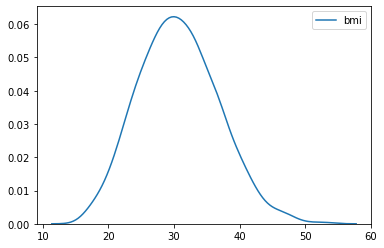

In [9]:
sns.kdeplot(insurance_df['bmi'])
plt.show()

**Note:**
* `The distribution for BMI is approximately normal`

#### Distribution of Age

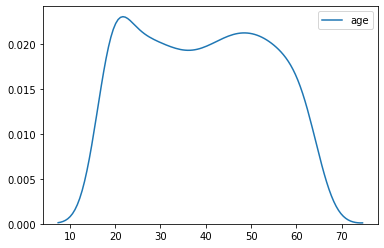

In [10]:
sns.kdeplot(insurance_df['age'])
plt.show()

**Note:**
* `Age appears to be a bimodal distribution`

#### Distribution of charges

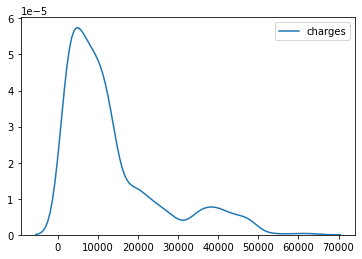

In [11]:
sns.kdeplot(insurance_df['charges'])
plt.show()

**Note:**
* `The distribution of charges is strongly skewed to the right`

## e. Skewness of BMI, Age, Charges

In [12]:
# We can use the .skew() function to get the skew of every distribution of every column in a dataframe

# insurance_df.skew() ---> To return skewness of every numerical field in dataset

print("SKEWNESS OF REQUESTED COLUMNS: ", end='\n\n')
print("Age: ", round(insurance_df.skew().age, 4))
print("BMI: ", round(insurance_df.skew().bmi, 4))
print("Charges: ", round(insurance_df.skew().charges, 4))


SKEWNESS OF REQUESTED COLUMNS: 

Age:  0.0557
BMI:  0.284
Charges:  1.5159


**Notes:** 
* `BMI - The skew function returns a positive value ~ 0.28 so we know it is slightly right skewed`
* `Age - The skew function returns ~ 0.056 so we know that this is barely right skewed`
* `Charges - The skew function returns ~ 1.5 so that means it is strongly right skewed`

## f. Looking for outliers

In box plots, outliers are shown as circles outside the whiskers, so we can graph a box plot for each column and look for outliers. We can also calculate whether a data point is an outlier with formula:
outlier > Q3 + 1.5* IQR or outlier < Q1 - 1.5* IQR

#### Outliers in BMI column

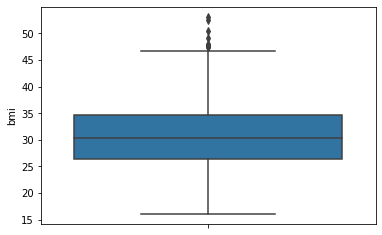

In [13]:
sns.boxplot(y='bmi', data=insurance_df)
plt.show()

**Notes:**
* `There are outliers present in the bmi column`
* `Assuming values above Q3+(1.5*IQR) are outliers, all values above 47.29 are considered outliers`

#### Outliers in Age column

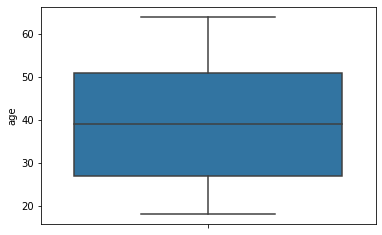

In [14]:
sns.boxplot(y='age', data=insurance_df)
plt.show()

**Notes:**
* `There are NO outliers in the age column`
* `Assuming values above Q3+(1.5*IQR) are outliers, any values above 87 could be considered outliers`

#### Outliers in charges column

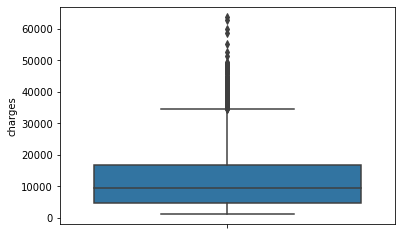

In [15]:
sns.boxplot(y='charges', data=insurance_df)
plt.show()

**Notes:**
* `There are several outliers in the charges column`
* `Assuming values above Q3+(1.5*IQR) are outliers, all values above 34489.35 are considered outliers`

## g. Distribution of Categorical Columns

#### Distribution of smoker

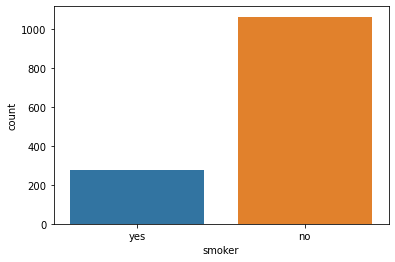

In [16]:
# We can use various plots to visualize the distribution of categorical data.
# For example: count plot, swarm plot etc. The count plot is more relevant for this question.

sns.countplot(insurance_df['smoker'])

**Note:**
* `Most of the customers don't smoke, let's look at exact values`

In [17]:
insurance_df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

**Notes:**
* `Only about 20.48% of the customers in this sample smoke`
* `Around 79.52% of the customers don't smoke`

#### Distribution of different regions

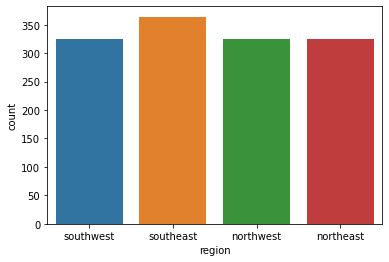

In [18]:
sns.countplot(insurance_df['region'])

**Notes:**
* `All of the regions seem to have the same number of customers (around 325) though southeast seems to have a little more than the rest (a bit more than 350)`
* `Let's look at the exact values, just to be sure`

In [19]:
insurance_df['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

**Note:**
* `Our earlier estimate seems to be approximately accurate`

#### Distribution of gender

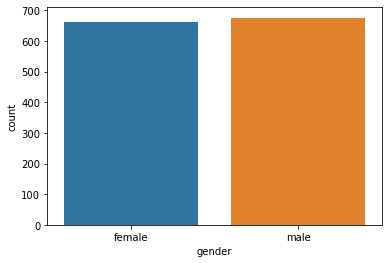

In [20]:
sns.countplot(insurance_df['gender'])

**Notes:**
* `There are slightly more male customers than female customers in this sample`
* `Once again, let's look at exact values`

In [21]:
insurance_df['gender'].value_counts()

male      676
female    662
Name: gender, dtype: int64

**Note:**
* `Only about 15 more males than females in this sample`

## h. Pair Plot that includes every column in the dataframe

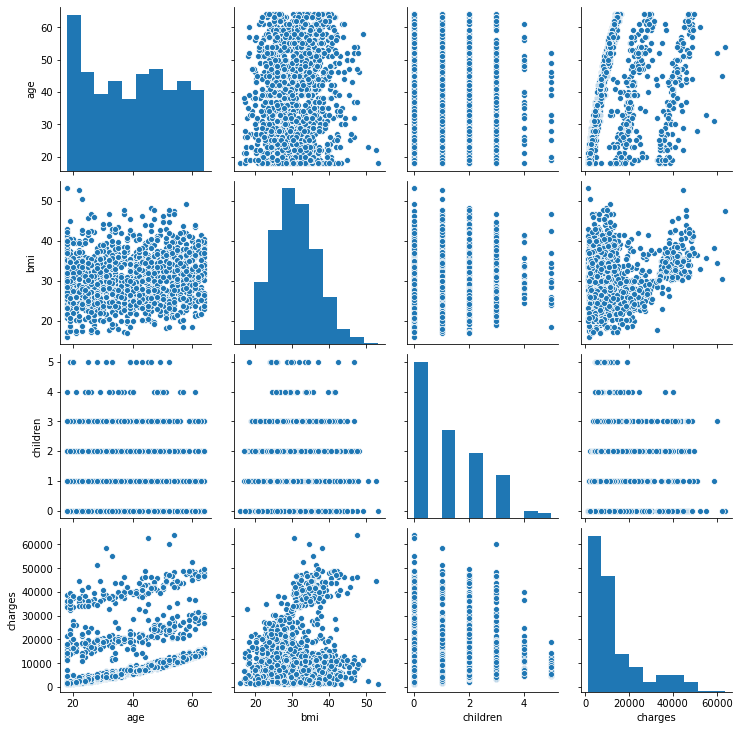

In [22]:
sns.pairplot(insurance_df)

**Note:**
* `The variables don't seem to have a strong correlation with one another`

**OBSERVATIONS:**
* `Dataframe contains 1338 rows and 7 columns`
* `Age is an integer variable`
* `Gender is a binary, categorical variable`
* `BMI is a continuous variable, it is the Body Mass Index`
* `Children is a discrete, integer variable`
* `Smoker is a binary, categorical variable, for whether the customer smokes or not`
* `Region is a discrete variable`
* `Charges is a continuous variable, for how much the company had to pay for the customers insurance`
* `There are no missing values in this dataframe`
* `Based on 5 point summary we can see that:`
* `Age is approximately normally distributed`
* `BMI is approximately normal in its distribution as well`
* `Based on mean and median, children is approximately normal, but the 3rd quartile and max say its right skewed, will perform deeper analysis when we vizualize it`
* `Charges seems to be positively skewed`
* `BMI column has an approximately normal distribution, thought it is slightly right skewed`
* `Age has a bimodal distribution, though it also has a slight right skew`
* `Charges column is strongly right skewed`
* `BMI has a few outliers; Any value above 47.29 can be considered an outlier by the 1.5*IQR rule`
* `There are no outliers in the age column, though any values above 87 years would have been considered an outlier`
* `Charges has many, many outliers and any value above 34489.35 is considered an outlier`
* `Most customers in this sample don't smoke, ratio of smokers to non smokers is about 80:20`
* `All the regions have approximately the same number of customers for this sample`
* `There are about 15 more males than females in this sample`
* `None of the variables seem to have a very strong correlation with one another`

## `--------------------------------END OF EDA------------------------------------`

## 4. Are the charges for the people that smoke significantly different than those who don't?

### DEFINING HYPOTHESIS
    
    H0: Charges for smoker = Charges for non-smoker
    H1: Charges for smoker >< Charges for non-smoker
### Assuming significance level α: 5% , Confidence level: 95%

#### Let's Vizualize the charges distribution for smoker and non-smoker using some plots
#### We do this to get a general idea of the distribution

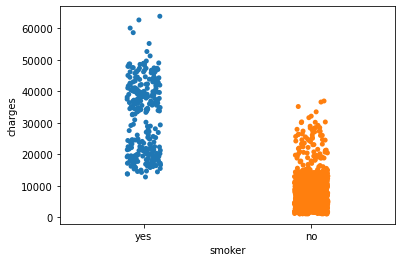

In [23]:
# Strip Plot
sns.stripplot(x='smoker', y='charges', data=insurance_df)

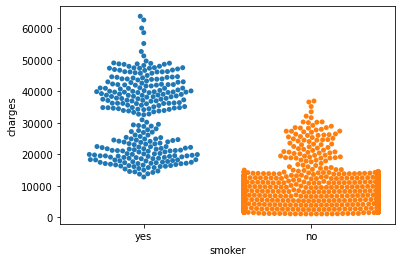

In [24]:
# Swarm Plot
sns.swarmplot(x='smoker', y='charges', data=insurance_df)

**Notes:**
* `The distributions between smokers and non-smokers seem to be different`
* `Let's see if this difference is significant`

#### Get mean charges for the people who smoke and the people who smoke and the people who don't, along with the mean difference

In [25]:
# Mean of charges of people who smoke
smokers = insurance_df['smoker'] == 'yes'
mean_charge_smoker = insurance_df.loc[smokers, 'charges'].mean()

In [26]:
# Mean charges for those who don't smoke
not_smokers = insurance_df['smoker'] == 'no'
mean_charge_not_smoker = insurance_df.loc[not_smokers, 'charges'].mean()

In [27]:
# Difference of means
mean_charge_diff = mean_charge_smoker - mean_charge_not_smoker

In [28]:
# Printing data
print(f"Mean charges of people who don't smoke: {mean_charge_not_smoker}")
print(f"Mean charges for those who do: {mean_charge_smoker}")
print(f"Mean difference: {mean_charge_diff}")

Mean charges of people who don't smoke: 8434.268297856199
Mean charges for those who do: 32050.23183153285
Mean difference: 23615.96353367665


#### Grouping people in the dataset based on whether they smoke or not

In [29]:
not_smoker_charges = insurance_df.loc[not_smokers, 'charges']
smoker_charges = insurance_df.loc[smokers, 'charges']

#### Computing the values into a 2-sample independant t-test and print output

In [30]:
# Compute values
t_stat , p_val = stats.ttest_ind(smoker_charges , not_smoker_charges)

In [31]:
# Print values
print(f"T-statistic for smokers and non-smoker charges: {t_stat}")
print(f"P-value: {p_val}")

T-statistic for smokers and non-smoker charges: 46.664921172723716
P-value: 8.271435842177219e-283


#### Use a condiitional statement to make a decision

In [32]:
if 1-p_val > 0.95:
    print("We can successfully REJECT the null hypothesis at a 95% confidence level")
else:
    print("We FAIL TO REJECT the null hypothesis at the 95% confidence level")

We can successfully REJECT the null hypothesis at a 95% confidence level


#### CONCLUSION:
#### REJECT null hypothesis

## 5. Does BMI of males significantly differ from that of females?

### DEFINING HYPOTHESIS
    H0: The BMI of male = BMI of female
    H1: The BMI of male >< BMI of female
### Assuming significance level α: 5% , Confidence level: 95%

#### Get mean BMI of males and females, along with the mean difference and print the data

In [33]:
# Mean BMI of male
male = insurance_df['gender'] == 'male'
mean_bmi_male = insurance_df.loc[male, 'bmi'].mean()

In [34]:
# Mean BMI of female
female = insurance_df['gender'] == 'female'
mean_bmi_female = insurance_df.loc[female, 'bmi'].mean()

In [35]:
# Mean difference
mean_bmi_diff = mean_bmi_male - mean_bmi_female

In [36]:
# Print data
print(f"Mean BMI of males: {mean_bmi_male}")
print(f"Mean BMI of females: {mean_bmi_female}")
print(f"Mean difference: {mean_bmi_diff}")

Mean BMI of males: 30.943128698224832
Mean BMI of females: 30.377749244713023
Mean difference: 0.5653794535118095


#### Make groups of BMI column based on a person's gender

In [37]:
male_bmi = insurance_df.loc[male, 'bmi']
female_bmi = insurance_df.loc[female, 'bmi']

#### Compute the values into a 2 sample t-test

In [38]:
t_stat_bmi , p_val_bmi = stats.ttest_ind(male_bmi , female_bmi)

#### Use conditional statements to print the result (REJECT or FAIL TO REJECT)

In [39]:
if 1-p_val_bmi > 0.95:
    print(f"At a {((1-p_val)*100) // 1}% confidence level, we can REJECT the null hypothesis")
else:
    print("We FAIL TO REJECT the null hypothesis at the 95% confidence level")

We FAIL TO REJECT the null hypothesis at the 95% confidence level


In [40]:
# At the 95% confidence level, we have made our decision, but let's still look at the p value we got
print(p_val_bmi.round(4))

0.09


#### CONCLUSION:
#### FAIL TO REJECT null hypothesis

## 6. Is the proportion of smokers singnificantly different in different genders?

### DEFINING HYPOTHESIS
    H0: Proportion of smokers across genders is the same
    H1: The proportion of smokers across genders is not the same
### Assuming significance level α: 5% , Confidence level: 95%

#### Get counts of total smokers and people based on gender

In [41]:
female_smokers = insurance_df[insurance_df['gender'] == 'female'].smoker.value_counts()[1]
male_smokers = insurance_df[insurance_df['gender'] == 'male'].smoker.value_counts()[1]
n_females = insurance_df.gender.value_counts()[1]
n_males = insurance_df.gender.value_counts()[0]

#### Compute the values into a test of proportions

In [42]:
stat, pval = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])

#### Use a conditional statement to obtain result

In [43]:
if pval < 0.05 and (((1-pval)*100)//1) != 95:
    print("At a 95% confidence level, we can REJECT the null hypothesis")
else:
    print('We fail to reject the null hypothsis at the 95% confidence level')

At a 95% confidence level, we can REJECT the null hypothesis


In [44]:
# At the 95% confidence level, we have made our decision, but let's still look at the p value we got
print(pval.round(4))

0.0053


#### CONCLUSION:
#### REJECT the null hypothesis

## 7. Is the distribution of BMI across women with a different number of kids the same?

### DEFINING HYPOTHESIS
    H0: The distribution of BMI is the same across vaious numbers of kids
    H1: The distribution of BMI varies across number of kids
### Assuming significance level α: 5% , Confidence level: 95%

#### Out of the insurance dataframe, make a new dataframe composed of only women

In [45]:
females = insurance_df.loc[insurance_df['gender'] == 'female']

In [46]:
females.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692


In [47]:
# Reset indices
females.reset_index(drop=True, inplace=True)

In [48]:
females.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
1,31,female,25.74,0,no,southeast,3756.62160
2,46,female,33.44,1,no,southeast,8240.58960
3,37,female,27.74,3,no,northwest,7281.50560
4,60,female,25.84,0,no,northwest,28923.13692


#### From the females dataframe, create new various dataframes based on number of kids

In [49]:
# Dataframe for no kids
no_kid_female = females.loc[females['children'] == 0]
no_kid_female.reset_index(drop=True, inplace=True)

In [50]:
# Dataframe for one kid
one_kid_female = females.loc[females['children'] == 1]
one_kid_female.reset_index(drop=True, inplace=True)

In [51]:
# Dataframe for two kids
two_kid_female = females.loc[females['children'] == 2]
two_kid_female.reset_index(drop=True, inplace=True)

#### Create an empty dataframe (we will use it for the final calculation)

In [52]:
women_bmi_df = pd.DataFrame()

#### Create new dataframes from the ones based on number of kids.
#### But only use 2 columns: Number of kids and BMI

In [53]:
no_kid= pd.DataFrame({"Kids": 0, "BMI": no_kid_female['bmi']})
one_kid= pd.DataFrame({"Kids": 1, "BMI": one_kid_female['bmi']})
two_kid= pd.DataFrame({"Kids": 2, "BMI": two_kid_female['bmi']})

#### Reset the indices of all the dataframe to make it look neater (optional)

In [54]:
no_kid.reset_index(drop=True, inplace=True)
one_kid.reset_index(drop=True, inplace=True)
two_kid.reset_index(drop=True, inplace=True)

#### Add the dataframes of kids (the ones with only 2 columns) to the empty females BMI dataframe we created earlier

In [55]:
women_bmi_df = women_bmi_df.append(no_kid)
women_bmi_df = women_bmi_df.append(one_kid)
women_bmi_df = women_bmi_df.append(two_kid)

### VIZUALIZING THE DATA:
#### Graph the data into a boxplot to get an idea as to how the distribution looks

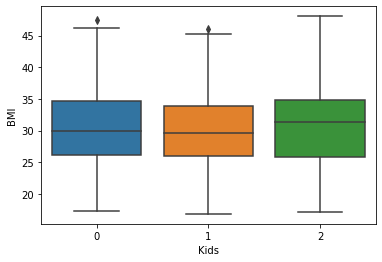

In [56]:
sns.boxplot(x='Kids', y='BMI', data=women_bmi_df)

**Note:**
* `These distributions look roughly the same`

#### Use the OLS (Ordinary Least Squares) function that we imported earlier to get P and F value as well as sum of squares

In [57]:
mod = ols('BMI ~ Kids', data=women_bmi_df).fit()
anova_table = sm.stats.anova_lm(mod, typ=2)
print(anova_table)

                sum_sq     df         F   PR(>F)
Kids          2.512982    1.0  0.068411  0.79376
Residual  20717.738725  564.0       NaN      NaN


#### Calculate all pairwise comparisons with the pairwise_tukeyhsd function imported earlier

In [58]:
# Computing in row of BMIs and row with number of kids
print(pairwise_tukeyhsd(women_bmi_df['BMI'], women_bmi_df['Kids']))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.3089 0.8494 -1.7186 1.1008  False
     0      2   0.2883 0.8942 -1.2636 1.8402  False
     1      2   0.5971 0.6797 -1.1323 2.3265  False
---------------------------------------------------


**OLS & ANOVA table** - `This tells us if any one distribution is different than the others by returning a P-value`

**pairwise_tukeyhsd function** - `This tells us which distribution is different than the others in the reject column, if it is True, then it is different, and if it is False that means it isn't`

#### CONCLUSION:
#### ANOVA & OLS - Returned P-value > significance level α we assumed; FAIL TO REJECT the null hypothesis.
#### Pairwise_tukeyhsd - Reconfirming the same conclusion